# From Scratch: Training a Neural Network to Classify Spiral Datasets

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('classic')

## Generate Data

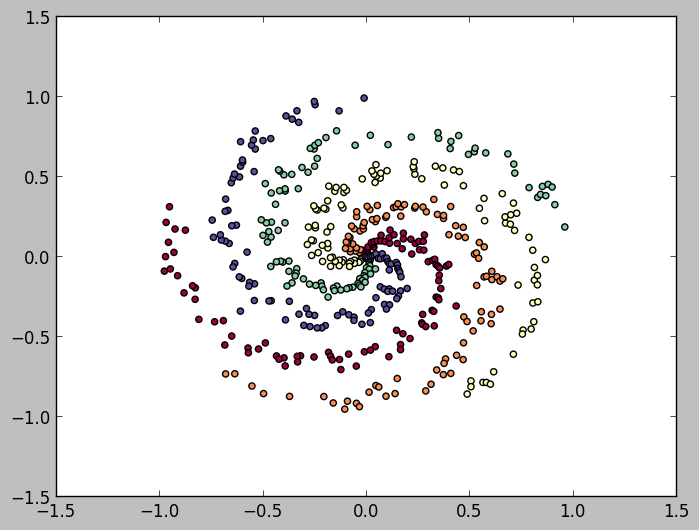

In [2]:
N = 100  # num of points per class
D = 2  # data dimension
K = 5  # num of classes, i.e. spirals

X = np.zeros((N* K,D))  # data matrix (each row = single example)
y = np.zeros(N* K, dtype='uint8')  # class labels

c = 2* math.pi* (K-1) / K
for j in range(K):
    ix = range(N* j, N* (j+1))
    r = np.linspace(0., 1, N)  # radius
    t = np.linspace(j* c, (j + 1)* c, N) + np.random.randn(N)* .2  # angle
    X[ix] = np.c_[r* np.sin(t), r* np.cos(t)]
    y[ix] = j
    
# Plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

## Define Model

In [3]:
H = 100  # num of hidden units

W1 = np.random.randn(D,H)*1e-2
b1 = np.zeros((1,H))
W2 = np.random.randn(H,K)*1e-2
b2 = np.zeros((1,K))

## Training

In [4]:
# Hyperparameters
lr = 1e-0
reg = 1e-3  # regularization strength

N = X.shape[0]

# Gradient descent loop
epoch = 5000
for i in range(epoch+1):
    """
    Forward-propagation
    """
    # Hidden layer
    Y1 = X.dot(W1) + b1
    H1 = np.maximum(Y1, 0)  # relu activation

    # Output layer
    Y2 = H1.dot(W2) + b2

    # Subtract max. output for numerical stability
#     Y2 -= np.amax(Y2, axis=1, keepdims=True)

    # Softmax
    exp_Y2 = np.exp(Y2)
    softmax = exp_Y2 / exp_Y2.sum(axis=1, keepdims=True)

    # Compute loss: average cross-entropy loss and regularization loss
    Loss_i = -np.log(softmax[range(N),y])  # CE loss for each training example

    data_loss = Loss_i.mean()
    reg_loss = 0.5* reg* (np.sum(W1**2)+ np.sum(W2**2))
    Loss = data_loss + reg_loss

    if i % 500 == 0: print('Epoch {0}: loss {1}'.format(i, Loss.round(4)))

    """
    Back-propagation
    Order: dY2 -> dW2, db2, dH1 -> dY1 -> dW1, db1
    """
    # dY2
    dY2 = softmax
    dY2[range(N),y] -= 1
    dY2 /= N

    # dW2 & db2
    dW2 = H1.T.dot(dY2)
    db2 = dY2.sum(axis=0, keepdims=True)

    # dH1
    dH1 = dY2.dot(W2.T)

    # dY1
    dY1 = dH1* (Y1 > 0)

    # dW1 & db1
    dW1 = X.T.dot(dY1)
    db1 = dY1.sum(axis=0, keepdims=True)

    # Add up regularization losses
    dW2 += reg* W2
    dW1 += reg* W1


    """
    Parameter update
    """
    W1 -= lr* dW1
    b1 -= lr* db1
    W2 -= lr* dW2
    b2 -= lr* db2

Epoch 0: loss 1.6095
Epoch 500: loss 1.1774
Epoch 1000: loss 0.8453
Epoch 1500: loss 0.8012
Epoch 2000: loss 0.7949
Epoch 2500: loss 0.8344
Epoch 3000: loss 0.8568
Epoch 3500: loss 0.8095
Epoch 4000: loss 0.7876
Epoch 4500: loss 0.7772
Epoch 5000: loss 0.7705


## Evaluate Training Accuracy

In [5]:
Y1 = X.dot(W1) + b1
H1 = np.maximum(Y1, 0)
Y2 = H1.dot(W2) + b2

pred = np.argmax(Y2, axis=1)
accu = np.mean(pred == y).round(2)
print('Training Accuracy: {0}'.format(accu))

Training Accuracy: 0.83


## Plot Decision Boundary

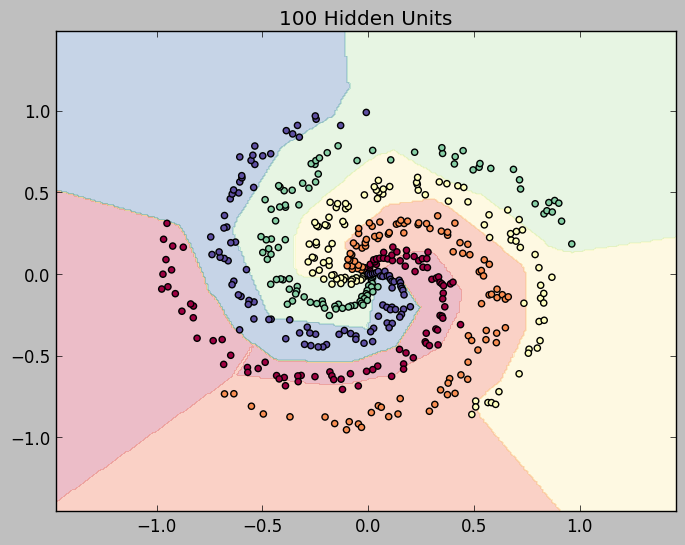

In [6]:
# plot the resulting classifier
h = 0.01

# Pick boundaries of x and y
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.title('{0} Hidden Units'.format(H))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
plt.show()